# Introduction to Linear Regression
Adapted from https://www.dataschool.io/linear-regression-in-python/ and https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb

It's not the fanciest machine learning technique, but it is a crucial technique to learn for many reasons:
- It's widely used and well-understood.
- It runs very fast!
- It's easy to use because minimal "tuning" is required.
- It's highly "interpretable", meaning that it's easy to explain to others.
- It's the basis for many other machine learning techniques.

We will be using both Statsmodel & scikit-learn libraries for linear modelling. For understanding linear regression with single and multiple features, we will use Advertising Data. Let's begin by loading necessary libraries and dataset and take a look at some data, ask some questions about that data

In [1]:
# Load Libraries
import pandas as pd
import matplotlib.pyplot as plt

# this allows plots to appear directly in the notebook
%matplotlib inline

In [3]:
# read data into a DataFrame
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


What are the <b>features</b>?
- TV: advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

What is the <b>response</b>?
- Sales: sales of a single product in a given market (in thousands of widgets)

In [4]:
# print the shape of the DataFrame
data.shape

(200, 4)

There are 200 observations, and thus 200 markets in the dataset. Let's visualize the relationship between the features and the response using scatterplots.

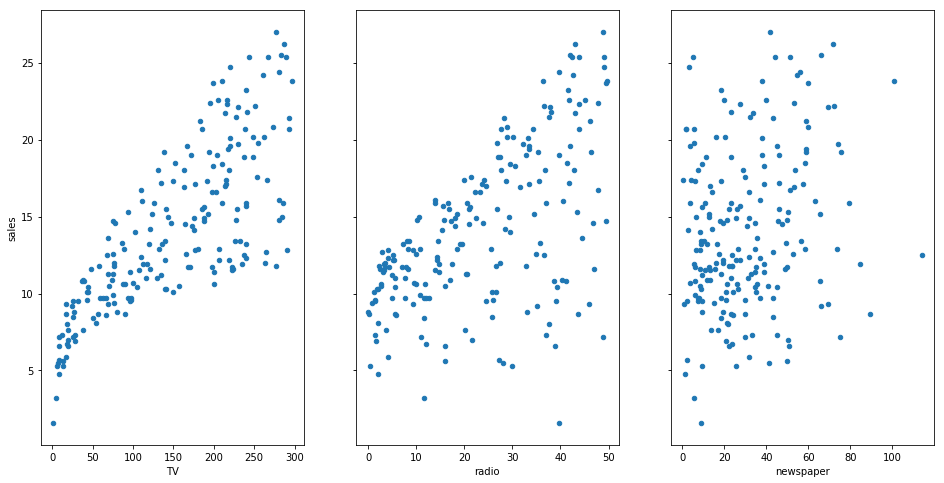

In [5]:
fig, axs = plt.subplots(1, 3, sharey=True)
data.plot(kind='scatter', x='TV', y='sales', ax=axs[0], figsize=(16, 8))
data.plot(kind='scatter', x='radio', y='sales', ax=axs[1])
data.plot(kind='scatter', x='newspaper', y='sales', ax=axs[2]);

This general question might lead you to more specific questions:
- Is there a relationship between ads and sales?
- How strong is that relationship?
- Which ad types contribute to sales?
- What is the effect of each ad type of sales?
- Given ad spending in a particular market, can sales be predicted?

## Simple Linear Regression
Simple linear regression is an approach for predicting a quantitative response using a single feature (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?

$y$ is the response
$x$ is the feature
$\beta_0$ is the intercept
$\beta_1$ is the coefficient for x
Together, $\beta_0$ and $\beta_1$ are called the model coefficients. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales!

Estimating ("Learning") Model Coefficients
Generally speaking, coefficients are estimated using the least squares criterion, which means we are find the line (mathematically) which minimizes the sum of squared residuals (or "sum of squared errors"):

## Estimating ("Learning") Model Coefficients
Generally speaking, coefficients are estimated using the least squares criterion, which means we are find the line (mathematically) which minimizes the sum of squared residuals (or "sum of squared errors"):
<img src="http://drive.google.com/uc?export=view&id=1OZq7waK6yAhmAup1svdRaH0ima_ECohR" />
- The black dots are the <b>observed values</b> of x and y.
- The blue line is our <b>least squares line</b>.
- The red lines are the <b>residuals</b>, which are the distances between the observed values and the least squares line.
- $\beta_0$ is the <b>intercept</b> (the value of $y$ when $x$=0)
- $\beta_1$ is the <b>slope</b> (the change in $y$ divided by change in $x$)

Here is a graphical depiction of those calculations:
<img src="http://drive.google.com/uc?export=view&id=1sIA8zT8SYhZQQxgi-j-y5xvl8H9oXiKw" />
Let's use <b>Statsmodels</b> to estimate the model coefficients for the advertising data:

In [6]:
import statsmodels.formula.api as smf

# create a fitted model in one line
lm_stats_model = smf.ols(formula='sales ~ TV', data=data).fit()

# print the coefficients
lm_stats_model.params

Intercept    7.032594
TV           0.047537
dtype: float64

## Interpreting Model Coefficients
How do we interpret the TV coefficient ($\beta_1$)?

- A "unit" increase in TV ad spending is associated with a 0.047537 "unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is associated with an increase in sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a decrease in sales, $\beta_1$ would be negative.

## Using the Model for Prediction
Let's say that there was a new market where the TV advertising spend was $50,000. What would we predict for the Sales in that market?

$$y = \beta_0 + \beta_1x$$$$y = 7.032594 + 0.047537 \times 50$$

In [7]:
# manually calculate the prediction
7.032594 + 0.047537*50

9.409444

Thus, we would predict Sales of <b>9,409 widgets</b> in that market. Of course, we can also use Statsmodels to make the prediction:

In [8]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50]})

# use the model to make predictions on a new value
lm_stats_model.predict(X_new)

0    9.409426
dtype: float64

## Plotting the Least Squares Line or Slope
Let's make predictions for the <b>smallest and largest observed values of x</b>, and then use the predicted values to plot the least squares line:

In [9]:
# create a DataFrame with the minimum and maximum values of TV
X_new = pd.DataFrame({'TV': [data.TV.min(), data.TV.max()]})
print('Min & Max values of TV feature:\n', X_new.head())

# make predictions for those x values and store them
preds = lm_stats_model.predict(X_new)
print('\nPrediction Values:\n', preds)

Min & Max values of TV feature:
       TV
0    0.7
1  296.4

Prediction Values:
 0     7.065869
1    21.122454
dtype: float64


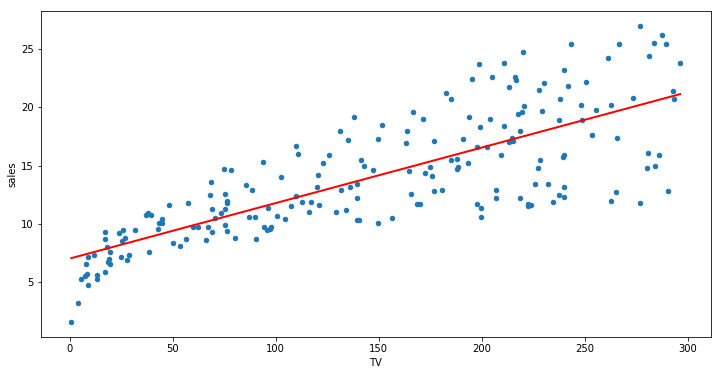

In [10]:
plt.rcParams['figure.figsize'] = (12, 6)

# first, plot the observed data
data.plot(kind='scatter', x='TV', y='sales')

# then, plot the least squares line
plt.plot(X_new, preds, c='red', linewidth=2);

## Confidence in our Model
Question: Is linear regression a high bias/low variance model, or a low bias/high variance model?

Answer: High bias/low variance. Under repeated sampling, the line will stay roughly in the same place (low variance), but the average of those models won't do a great job capturing the true relationship (high bias). Note that low variance is a useful characteristic when you don't have a lot of training data!

A closely related concept is confidence intervals. Statsmodels calculates 95% confidence intervals for our model coefficients, which are interpreted as follows: If the population from which this sample was drawn was sampled 100 times, approximately 95 of those confidence intervals would contain the "true" coefficient.

In [11]:
# print the confidence intervals for the model coefficients
lm_stats_model.conf_int() # Min and Max TV features coefficients

,0,1
Intercept,6.129719,7.935468
TV,0.042231,0.052843


Keep in mind that we only have a single sample of data, and not the entire population of data. The "true" coefficient is either within this interval or it isn't, but there's no way to actually know. We estimate the coefficient with the data we do have, and we show uncertainty about that estimate by giving a range that the coefficient is probably within.

Note that using 95% confidence intervals is just a convention. You can create 90% confidence intervals (which will be more narrow), 99% confidence intervals (which will be wider), or whatever intervals you like.

## Hypothesis Testing and p-values
Closely related to confidence intervals is hypothesis testing. Generally speaking, you start with a null hypothesis and an alternative hypothesis (that is opposite the null). Then, you check whether the data supports rejecting the null hypothesis or failing to reject the null hypothesis.

(Note that "failing to reject" the null is not the same as "accepting" the null hypothesis. The alternative hypothesis may indeed be true, except that you just don't have enough data to show that.)

As it relates to model coefficients, here is the conventional hypothesis test:
- null hypothesis: There is no relationship between TV ads and Sales (and thus $\beta_1$ equals zero)
- alternative hypothesis: There is a relationship between TV ads and Sales (and thus $\beta_1$ is not equal to zero)

How do we test this hypothesis? Intuitively, we reject the null (and thus believe the alternative) if the 95% confidence interval does not include zero. Conversely, the p-value represents the probability that the coefficient is actually zero:

In [12]:
# print the p-values for the model coefficients
lm_stats_model.pvalues

Intercept    1.406300e-35
TV           1.467390e-42
dtype: float64

If the 95% confidence interval includes zero, the p-value for that coefficient will be greater than 0.05. If the 95% confidence interval does not include zero, the p-value will be less than 0.05. Thus, a p-value less than 0.05 is one way to decide whether there is likely a relationship between the feature and the response. (Again, using 0.05 as the cutoff is just a convention.)

In this case, the p-value for TV is far less than 0.05, and so we believe that there is a relationship between TV ads and Sales. Note: that we generally ignore the p-value for the intercept.

## How Well Does the Model Fit the data?
The most common way to evaluate the overall fit of a linear model is by the R-squared value. R-squared is the proportion of variance explained, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the null model. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. Here's an example of what R-squared "looks like":
<img src="http://drive.google.com/uc?export=view&id=1r-fhnh1vSnlhAbzNvWV7N59ZGjVXYV1q" />
You can see that the blue line explains some of the variance in the data (R-squared=0.54), the green line explains more of the variance (R-squared=0.64), and the red line fits the training data even further (R-squared=0.66). (Does the red line look like it's overfitting?)

Let's calculate the R-squared value for our simple linear model:

In [13]:
# print the R-squared value for the model
lm_stats_model.rsquared

0.61187505085007099

Is that a "good" R-squared value? It's hard to say. The threshold for a good R-squared value depends widely on the domain. Therefore, it's most useful as a tool for comparing different models. R-squared can be tuned / improved based transforming the features or handling outliers, imputing missing values, etc.

R – Square (R2) - Formula for calculating R2 is given by: (TSS - RSS) / TSS
- Total Sum of Squares (TSS) : TSS is a measure of total variance in the response/ dependent variable Y and can be thought of as the amount of variability inherent in the response before the regression is performed.
- Residual Sum of Squares (RSS) : RSS measures the amount of variability that is left unexplained after performing the regression.
- (TSS – RSS) measures the amount of variability in the response that is explained (or removed) by performing the regression

Where N is the number of observations used to fit the model, σx is the standard deviation of x, and σy is the standard deviation of y.
- R2 ranges from 0 to 1.
- R2 of 0 means that the dependent variable cannot be predicted from the independent variable
- R2 of 1 means the dependent variable can be predicted without error from the independent variable
- An R2 between 0 and 1 indicates the extent to which the dependent variable is predictable. An R2 of 0.20 means that 20 percent of the variance in Y is predictable from X; an R2 of 0.40 means that 40 percent is predictable; and so on.


## Multiple Linear Regression
Simple linear regression can easily be extended to include multiple features. This is called multiple linear regression:

$y = \beta_0 + \beta_1x_1 + ... + \beta_nx_n$

Each $x$ represents a different feature, and each feature has its own coefficient. In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

Let's use Statsmodels to estimate these coefficients:

In [14]:
# create a fitted model with all three features
lm_stats_model = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()

# print the coefficients
lm_stats_model.params

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

How do we interpret these coefficients? For a given amount of Radio and Newspaper ad spending, an <b>increase of $1000 in TV ad spending</b> is associated with an <b>increase in Sales of 45.765 widgets</b>.

A lot of the information we have been reviewing piece-by-piece is available in the model summary output:

In [15]:
# print a summary of the fitted model
lm_stats_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Tue, 03 Jul 2018   Prob (F-statistic):           1.58e-96
Time:                        20:25:57   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What are a few key things we learn from this output?
- TV and Radio have significant p-values, whereas Newspaper does not. Thus we reject the null hypothesis for TV and Radio (that there is no association between those features and Sales), and fail to reject the null hypothesis for Newspaper.
- TV and Radio ad spending are both positively associated with Sales, whereas Newspaper ad spending is slightly negatively associated with Sales. (However, this is irrelevant since we have failed to reject the null hypothesis for Newspaper.)
- This model has a higher R-squared (0.897) than the previous model, which means that this model provides a better fit to the data than a model that only includes TV.

## Feature Selection
How do I decide which features to include in a linear model? Here's one idea:
- Try different models, and only keep predictors in the model if they have small p-values.
- Check whether the R-squared value goes up when you add new predictors.

What are the drawbacks to this approach?
- Linear models rely upon a lot of assumptions (such as the features being independent), and if those assumptions are violated (which they usually are), R-squared and p-values are less reliable.
- Using a p-value cutoff of 0.05 means that if you add 100 predictors to a model that are pure noise, 5 of them (on average) will still be counted as significant.
- R-squared is susceptible to overfitting, and thus there is no guarantee that a model with a high R-squared value will generalize. Below is an example:

In [16]:
# only include TV and Radio in the model
lm_stats_model = smf.ols(formula='sales ~ TV + radio', data=data).fit()
print('R-squared value using TV and Radio features: ', lm_stats_model.rsquared)
print('Adjusted R-squared value using TV and Radio features: ', lm_stats_model.rsquared_adj)

# add Newspaper to the model (which we believe has no association with Sales)# add Ne 
lm_stats_model = smf.ols(formula='sales ~ TV + radio + newspaper', data=data).fit()
print('\nR-squared value using TV, Radio & Newspaper features:', lm_stats_model.rsquared)
print('Adjusted R-squared value using TV, Radio & Newspaper features: ', lm_stats_model.rsquared_adj)

R-squared value using TV and Radio features:  0.897194261083
Adjusted R-squared value using TV and Radio features:  0.896150547997

R-squared value using TV, Radio & Newspaper features: 0.897210638179
Adjusted R-squared value using TV, Radio & Newspaper features:  0.89563733162


R-squared will always increase as you add more features to the model, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called adjusted R-squared that penalizes model complexity (to control for overfitting), but it generally under-penalizes complexity. You can notice above, the adjusted R-squared is better with TV & Radio features than the model having Newspaper features.

However, there a better approach to feature selection? Cross-validation. It provides a more reliable estimate of out-of-sample error, and thus is a better way to choose which of your models will best generalize to out-of-sample data. There is extensive functionality for cross-validation in scikit-learn, including automated methods for searching different sets of parameters and different models. Importantly, cross-validation can be applied to any model, whereas the methods described above only apply to linear models.

We will look into Cross-validation later, but first let's build the model using scikit-learn library.
## Linear Regression in scikit-learn
Let's redo some of the Statsmodels code above in scikit-learn:

In [17]:
# create X and y# create 
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data.sales

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm_sklearn_model = LinearRegression()
lm_sklearn_model.fit(X, y)

# print intercept and coefficients
print('Model Intercept: ', lm_sklearn_model.intercept_)

model_coef = zip(feature_cols, lm_sklearn_model.coef_)
print('Model Coefficients:')
for values in model_coef:
    print(values)  # print each coefficient

# predict for a new observation
X_new = pd.DataFrame({'TV': [100], 'radio':[25], 'newspaper':[25]})
print('\nPredicted Sales value for TV:100, Radio:25 & Newspaper:25 is ', lm_sklearn_model.predict(X_new))

# calculate the R-squared
print('R-squared value: ', lm_sklearn_model.score(X, y))

Model Intercept:  2.93888936946
Model Coefficients:
('TV', 0.045764645455397608)
('radio', 0.18853001691820462)
('newspaper', -0.0010374930424762972)

Predicted Sales value for TV:100, Radio:25 & Newspaper:25 is  [ 12.20266701]
R-squared value:  0.897210638179


In [18]:
from sklearn import metrics
import numpy as np

y_pred = lm_sklearn_model.predict(X)  

print('Mean Absolute Error      : ', metrics.mean_absolute_error(y, y_pred))  
print('Mean Squared Error       : ', metrics.mean_squared_error(y, y_pred))  
print('Root Mean Squared Error  : ', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('Sales Mean Value         : ', np.mean(y))
print('R-squared Value          : ', metrics.r2_score(y, y_pred))

r_squared = metrics.r2_score(y, y_pred)
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)

print('Adjusted R-squared Value : ', adjusted_r_squared)

Mean Absolute Error      :  1.25201122969
Mean Squared Error       :  2.78412631451
Root Mean Squared Error  :  1.66857014072
Sales Mean Value         :  14.022500000000003
R-squared Value          :  0.897210638179
Adjusted R-squared Value :  0.89563733162


You can observe that p-values, confidence intervals, etc. are not (easily) accessible through scikit-learn. However, they are easily available in statsmodel if we use the summary function. But, we can use both of the models for training linear model for the dataset and predict the values.
## Detecting Multicollinearity
Multi-collinearity tells us the strength of relationship between independent variables. If there is Multi-Collinearity in our data, our beta coefficients may be misleading. VIF (Variance Inflation Factor) is used to identify the Multi-collinearity. If VIF value is greater than 5 we exclude that variable from our model building exercise. We will use the statsmodel for identifing the multicollinearity index of each independent feature.

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = lm_stats_model.model.exog
var_names = lm_stats_model.model.exog_names
vif = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]

vif_values = zip(var_names, vif)
print('VIF of Each Independent Feature:')
for values in vif_values:
    print(values)  # print each vif of each independent feature

VIF of Each Independent Feature:
('Intercept', 6.8488999533349544)
('TV', 1.0046107849396502)
('radio', 1.1449519171055353)
('newspaper', 1.1451873787239288)


Excluding the "Intercept" variable, we can observe above that none of features have VIF score greated than 5. A rule of thumb for interpreting the variance inflation factor:
- 1 = not correlated.
- Between 1 and 5 = moderately correlated.
- Greater than 5 = highly correlated.

Variance inflation factors range from 1 upwards. The numerical value for VIF tells you (in decimal form) what percentage the variance (i.e. the standard error squared) is inflated for each coefficient. For example, a VIF of 1.9 tells you that the variance of a particular coefficient is 90% bigger than what you would expect if there was no multicollinearity — if there was no correlation with other predictors. Hence, we can conclude that all independent features above are very less correlated.
## K-Folds Cross Validation
In K-Folds Cross Validation we split our data into k different subsets (or folds). We use k-1 subsets to train our data and leave the last subset (or the last fold) as test data. We then average the model against each of the folds and then finalize our model. After that we test it against the test set.

Cross-validated scores:  [ 0.87841656  0.91396029  0.90508856  0.8438298   0.8950119   0.90321822]
Cross-Predicted Accuracy:  0.890974408977


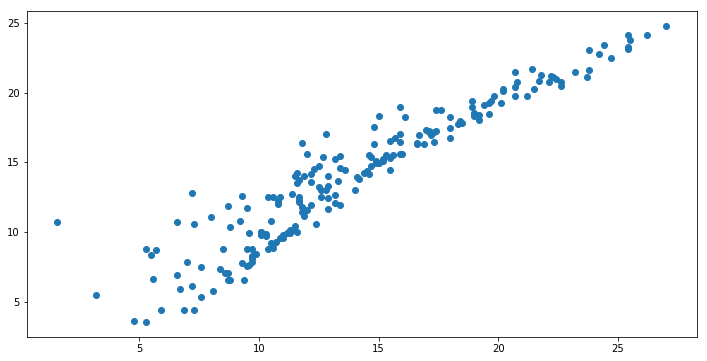

In [21]:
from sklearn.cross_validation import cross_val_score, cross_val_predict

# Perform 6-fold cross validation
scores = cross_val_score(lm_sklearn_model, X, y, cv=6)
print('Cross-validated scores: ', scores)

# Make cross validated predictions
predictions = cross_val_predict(lm_sklearn_model, X, y, cv=6)

accuracy = metrics.r2_score(y, predictions)
print('Cross-Predicted Accuracy: ', accuracy)

plt.scatter(y, predictions);

## Handling Categorical Predictors with Two Categories
Up to now, all of our predictors have been numeric. What if one of our predictors was categorical? Let's create a new feature called Size, and randomly assign observations to be small or large:

In [22]:
import numpy as np

# set a seed for reproducibility
np.random.seed(12345)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(data))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
data['Size'] = 'small'
data.loc[mask_large, 'Size'] = 'large'
data.head()

,TV,radio,newspaper,sales,Size
1,230.1,37.8,69.2,22.1,large
2,44.5,39.3,45.1,10.4,small
3,17.2,45.9,69.3,9.3,small
4,151.5,41.3,58.5,18.5,small
5,180.8,10.8,58.4,12.9,large


For scikit-learn, we need to represent all data numerically. If the feature only has two categories, we can simply create a dummy variable that represents the categories as a binary value:

In [23]:
# create a new Series called IsLarge
data['IsLarge'] = data.Size.map({'small':0, 'large':1})
data.head()

,TV,radio,newspaper,sales,Size,IsLarge
1,230.1,37.8,69.2,22.1,large,1
2,44.5,39.3,45.1,10.4,small,0
3,17.2,45.9,69.3,9.3,small,0
4,151.5,41.3,58.5,18.5,small,0
5,180.8,10.8,58.4,12.9,large,1


Let's redo the multiple linear regression and include the IsLarge predictor:

In [24]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper', 'IsLarge']
X = data[feature_cols]
y = data.sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
model_coef = zip(feature_cols, lm.coef_)
print('Model Coefficients:')
for values in model_coef:
    print(values)  # print each coefficient

Model Coefficients:
('TV', 0.045719820924362775)
('radio', 0.18872814313427869)
('newspaper', -0.0010976794483516079)
('IsLarge', 0.0574238508548277)


How do we interpret the <b>IsLarge coefficient</b>? For a given amount of TV/Radio/Newspaper ad spending, being a large market is associated with an average increase in Sales of 57.42 widgets (as compared to a Small market, which is called the baseline level).

What if we had reversed the 0/1 coding and created the feature 'IsSmall' instead? The coefficient would be the same, except it would be <b>negative instead of positive</b>. As such, your choice of category for the baseline does not matter, all that changes is your interpretation of the coefficient.

## Handling Categorical Predictors with More than Two Categories
Let's create a new feature called Area, and randomly assign observations to be rural, suburban, or urban:

In [25]:
# set a seed for reproducibility
np.random.seed(123456)

# assign roughly one third of observations to each group
nums = np.random.rand(len(data))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
data['Area'] = 'rural'
data.loc[mask_suburban, 'Area'] = 'suburban'
data.loc[mask_urban, 'Area'] = 'urban'
data.head()

,TV,radio,newspaper,sales,Size,IsLarge,Area
1,230.1,37.8,69.2,22.1,large,1,rural
2,44.5,39.3,45.1,10.4,small,0,urban
3,17.2,45.9,69.3,9.3,small,0,rural
4,151.5,41.3,58.5,18.5,small,0,urban
5,180.8,10.8,58.4,12.9,large,1,suburban


We have to represent Area numerically, but we can't simply code it as 0=rural, 1=suburban, 2=urban because that would imply an ordered relationship between suburban and urban (and thus urban is somehow "twice" the suburban category). Instead, we create another dummy variable:

In [26]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(data.Area, prefix='Area').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
data = pd.concat([data, area_dummies], axis=1)
data.head()

,TV,radio,newspaper,sales,Size,IsLarge,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,large,1,rural,0,0
2,44.5,39.3,45.1,10.4,small,0,urban,0,1
3,17.2,45.9,69.3,9.3,small,0,rural,0,0
4,151.5,41.3,58.5,18.5,small,0,urban,0,1
5,180.8,10.8,58.4,12.9,large,1,suburban,1,0


Here is how we interpret the coding:

- rural is coded as Area_suburban=0 and Area_urban=0
- suburban is coded as Area_suburban=1 and Area_urban=0
- urban is coded as Area_suburban=0 and Area_urban=1

Why do we only need two dummy variables, not three? Because two dummies captures all of the information about the Area feature, and implicitly defines rural as the baseline level. (In general, if you have a categorical feature with k levels, you create k-1 dummy variables.)

If this is confusing, think about why we only needed one dummy variable for Size (IsLarge), not two dummy variables (IsSmall and IsLarge). Let's include the two new dummy variables in the model:

In [27]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper', 'IsLarge', 'Area_suburban', 'Area_urban']
X = data[feature_cols]
y = data.sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
model_coef = zip(feature_cols, lm.coef_)
print('Model Coefficients:')
for values in model_coef:
    print(values)  # print each coefficient

Model Coefficients:
('TV', 0.045744010363313749)
('radio', 0.18786669552525811)
('newspaper', -0.0010876977267108138)
('IsLarge', 0.077396607497479092)
('Area_suburban', -0.10656299015958638)
('Area_urban', 0.26813802165220063)


How do we interpret the coefficients?

- Holding all other variables fixed, being a suburban area is associated with an average decrease in Sales of 106.56 widgets (as compared to the baseline level, which is rural).
- Being an urban area is associated with an average increase in Sales of 268.13 widgets (as compared to rural).

A final note about dummy encoding: If you have categories that can be ranked (i.e., strongly disagree, disagree, neutral, agree, strongly agree), you can potentially use a single dummy variable and represent the categories numerically (such as 1, 2, 3, 4, 5).

Model building is not one step process, one need to run multiple iterations in order to reach a final model. Take care of P-Value and VIF for variable selection and R-Squared, RMSE & MAPE for model selection.

#### What more we can Explore?
- Detecting collinearity
- Diagnosing model fit
- Transforming predictors to fit non-linear relationships
- Interaction terms
- Assumptions of linear regression
- And so much more!

You could certainly go very deep into linear regression, and learn how to apply it really, really well. It's an excellent way to start your modeling process when working a regression problem. However, it is limited by the fact that it can only make good predictions if there is a linear relationship between the features and the response, which is why more complex methods (with higher variance and lower bias) will often outperform linear regression.

## Four Assumptions Of Multiple Regression
### VARIABLES ARE NORMALLY DISTRIBUTED
Regression assumes that variables have normal distributions. Non-normally distributed variables (highly skewed or
kurtotic variables, or variables with substantial outliers) can distort relationships and significance tests.
### A LINEAR RELATIONSHIP BETWEEN THE INDEPENDENT AND DEPENDENT VARIABLE(S)
Standard multiple regression can only accurately estimate the relationship between dependent and independent
variables if the relationships are linear in nature. As there are many instances in the social sciences where non-linear
relationships occur (e.g., anxiety), it is essential to examine analyses for non-linearity. If the relationship between
independent variables (IV) and the dependent variable (DV) is not linear, the results of the regression analysis will
under-estimate the true relationship.
### VARIABLES ARE MEASURED WITHOUT ERROR (RELIABLY)

### ASSUMPTION OF HOMOSCEDASTICITY
Homoscedasticity means that the variance of errors is the same across all levels of the IV. When the variance of errors
differs at different values of the IV, heteroscedasticity is indicated. This assumption can be checked by visual examination of a plot of the standardized residuals (the errors) by the regression standardized predicted value. Most modern statistical packages include this as an option.